In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
medical_df = pd.read_csv(r'C:\\Users\\CICD STUDENT\\Desktop\\Data-Analytics-A\\Datasets\\medical-charges.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [5]:
non_smoker_df = medical_df[medical_df['smoker'] == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


Visualizing the relationship between age and charges

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

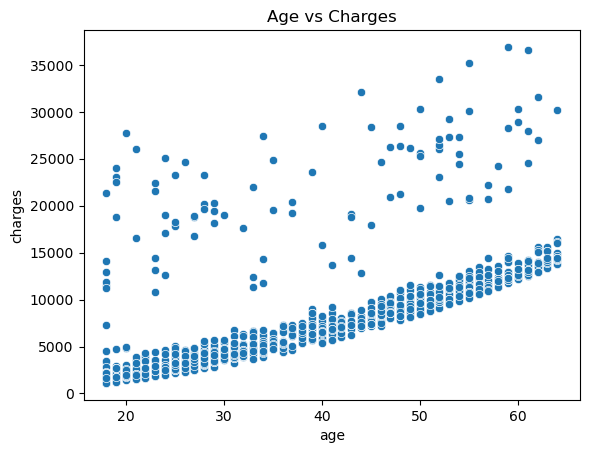

In [6]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges')

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). 

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

### Optimizer

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
* Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives. 

## Linear Regression using Scikit-learn

Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

# do train test split - goal: avoid bias
X = non_smoker_df[['age']]
y = non_smoker_df.charges
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# fit model
model.fit(X_train, y_train)

LinearRegression()

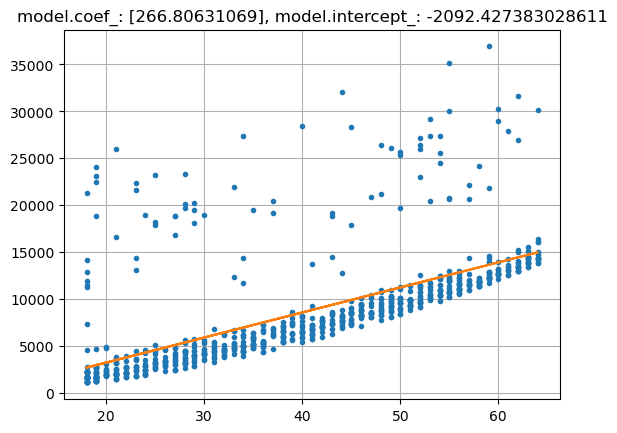

In [13]:
# plotting fit of the model

fit_fun = lambda x: model.coef_ * x + model.intercept_

x_plot = X_train.to_numpy()
y_plot = y_train.to_numpy()

y_fit = fit_fun(x_plot)
# print(fit_fun(7))

plt.figure()
# plt.title(f'lr.coef_: {lr.coef_:0.3f}, lr.intercept_: {lr.intercept_:0.3f}')
plt.title(f'model.coef_: {model.coef_}, model.intercept_: {model.intercept_}')
plt.plot(x_plot, y_plot, '.')
plt.plot(x_plot, y_fit)
plt.grid()

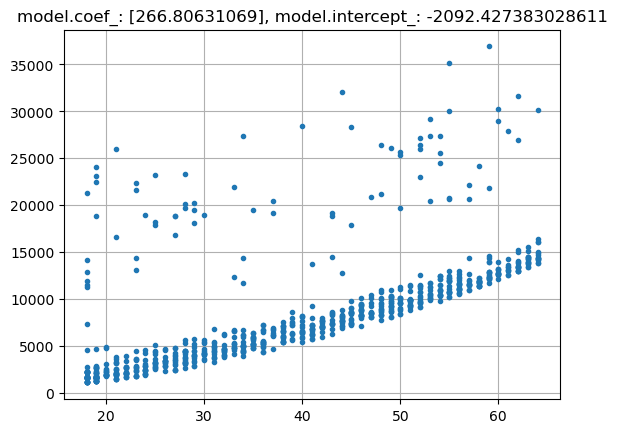

In [20]:
# plotting fit of the model

# fit_fun = lambda x: model.coef_ * x + model.intercept_

x_plot = X_train.to_numpy()
y_plot = y_train.to_numpy()

# y_fit = fit_fun(x_plot)
# print(fit_fun(7))

plt.figure()
# plt.title(f'lr.coef_: {lr.coef_:0.3f}, lr.intercept_: {lr.intercept_:0.3f}')
plt.title(f'model.coef_: {model.coef_}, model.intercept_: {model.intercept_}')
plt.plot(x_plot, y_plot, '.')
# plt.plot(x_plot, y_fit)
plt.grid()

In [14]:
# generating predictions

y_pred = model.predict(X_test)
y_pred

array([ 6712.18086958,  4310.92407341,  8846.63135506,  7512.59980163,
        5111.34300547,  4844.53669478, 11514.69446191,  6445.37455889,
        9647.05028711, 11781.50077259, 10714.27552985, 14449.56387944,
        9647.05028711,  6445.37455889, 14182.75756876,  2710.0862093 ,
       13382.3386367 , 10981.08184054,  2976.89251999, 14182.75756876,
        2710.0862093 ,  6712.18086958,  8846.63135506,  8579.82504437,
       12315.11339396,  5644.95562684, 10714.27552985,  7512.59980163,
        6178.56824821,  8313.01873369, 14716.37019013,  4310.92407341,
       13382.3386367 ,  9913.8565978 , 13915.95125807,  2710.0862093 ,
       11247.88815122,  8846.63135506, 10180.66290848,  4577.7303841 ,
        5911.76193752,  9647.05028711,  8846.63135506, 11781.50077259,
        4844.53669478,  7779.40611232,  7779.40611232,  5378.14931615,
        2710.0862093 , 12848.72601533, 13915.95125807, 13382.3386367 ,
       12048.30708328, 11514.69446191,  7245.79349095,  8579.82504437,
      

In [15]:
# calculating rmse:  average difference between values predicted by a model and the actual values

def rmse(measured, predictions):
    return np.sqrt(np.mean(np.square(measured - predictions)))

rmse(y_test, y_pred)

5028.1559880234945

In [17]:
# calculating r-squared score

from sklearn.metrics import r2_score

r_squared_score = r2_score(y_test, y_pred)
r_squared_score

0.34541465793093196

Seems like our prediction is off by $5000 on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [19]:
print(f'model.coef_: {model.coef_}')
print(f'model.intercept_: {model.intercept_}')

model.coef_: [266.80631069]
model.intercept_: -2092.427383028611


## Attempt at separating groups in charges vs age

In [21]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


### Try separation by sex

Because it's binary

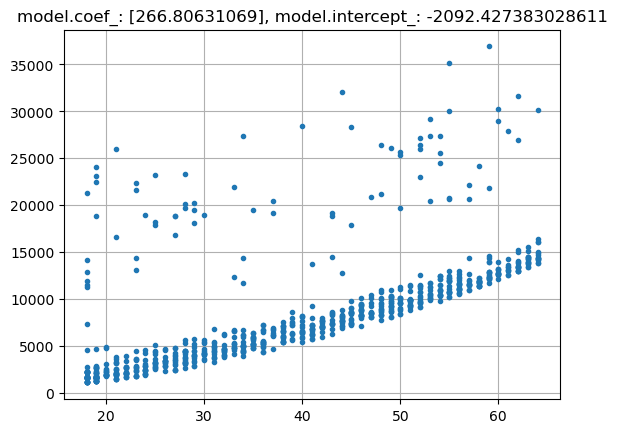

In [20]:
# plotting fit of the model

# fit_fun = lambda x: model.coef_ * x + model.intercept_

x_plot = X_train.to_numpy()
y_plot = y_train.to_numpy()

# y_fit = fit_fun(x_plot)
# print(fit_fun(7))

plt.figure()
# plt.title(f'lr.coef_: {lr.coef_:0.3f}, lr.intercept_: {lr.intercept_:0.3f}')
plt.title(f'model.coef_: {model.coef_}, model.intercept_: {model.intercept_}')
plt.plot(x_plot, y_plot, '.')

# plt.plot(x_plot, y_fit)
plt.grid()

<Axes: xlabel='age', ylabel='charges'>

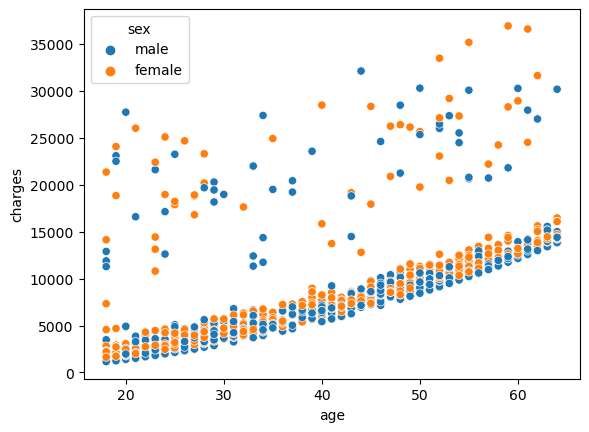

In [22]:
sns.scatterplot(data=non_smoker_df, x='age', y='charges', hue='sex')

# we can see that sex doesn't separate charges into two groups

<Axes: xlabel='age', ylabel='charges'>

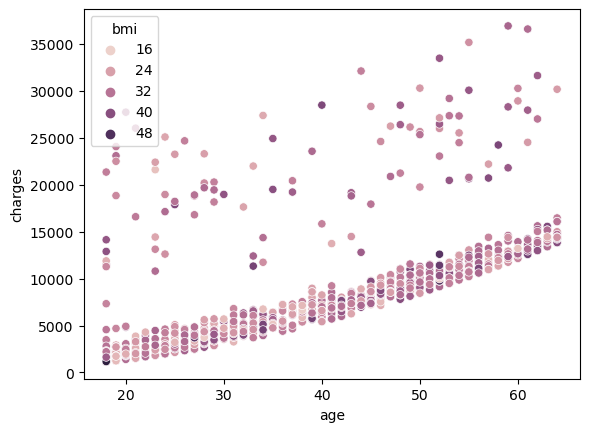

In [23]:
sns.scatterplot(data=non_smoker_df, x='age', y='charges', hue='bmi')

<Axes: xlabel='bmi', ylabel='charges'>

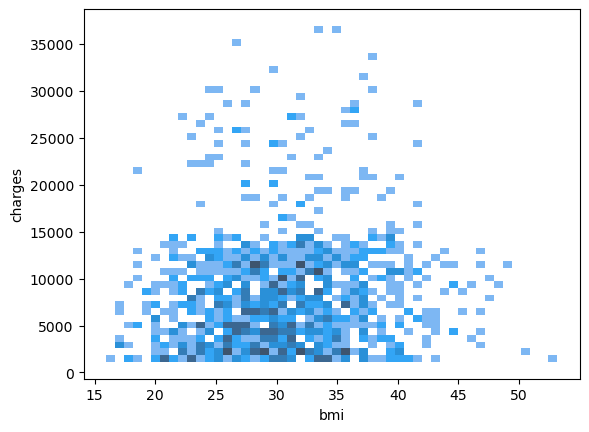

In [28]:
sns.histplot(data=non_smoker_df, x='bmi', y='charges', bins=50)

In [40]:
charges_high = non_smoker_df[non_smoker_df['charges'] > 17000]
charges_high

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692
45,55,male,37.300,0,no,southwest,20630.28351
62,64,male,24.700,1,no,northwest,30166.61817
102,18,female,30.115,0,no,northeast,21344.84670
...,...,...,...,...,...,...,...
1206,59,female,34.800,2,no,southwest,36910.60803
1211,39,male,34.100,2,no,southeast,23563.01618
1258,55,male,37.715,3,no,northwest,30063.58055
1318,35,male,39.710,4,no,northeast,19496.71917


<Axes: xlabel='bmi', ylabel='charges'>

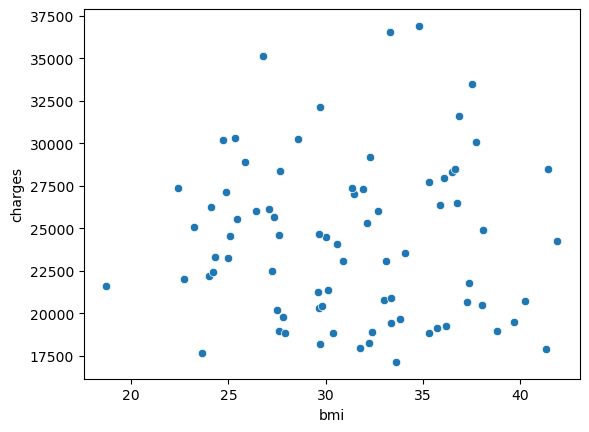

In [41]:
sns.scatterplot(data=charges_high, x='bmi', y='charges')

<Axes: xlabel='age', ylabel='charges'>

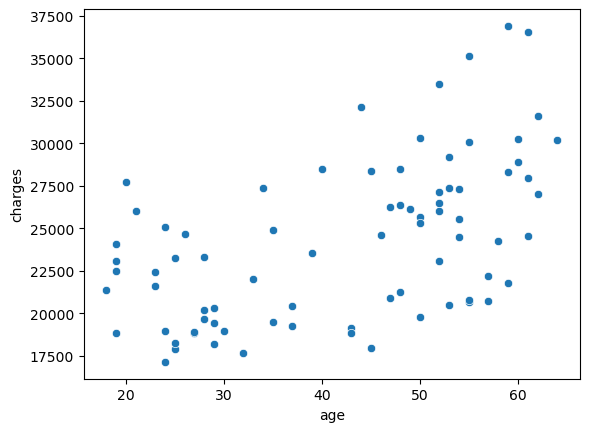

In [44]:
sns.scatterplot(data=charges_high, x='age', y='charges')

## Conclusion: we don't see simple criteria to separate the data

## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [ ]:
# create inputs and targets
X = non_smoker_df[['age', 'bmi']]
y = non_smoker_df['charges']

# do train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=)